Import libraries 

In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from scipy import stats
from scipy.stats import boxcox
from sklearn.preprocessing import  MinMaxScaler

Load dataset 

In [7]:
dataset = pd.read_csv('Heart_attack_monitor_dataset.csv')

x = dataset[['ECG Records', 'Spo2', 'Peaks']]  # Assign features to X
y = dataset['OutputTriage level']  # Assign the target variable to y

X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size=0.7, random_state=42)
dataset = dataset.drop('ECG Records', axis=1)

Visualized data

In [8]:
print(dataset.describe())


pd.set_option("display.max.columns", None)
dataset.head()

             Spo2       Peaks
count  474.000000  474.000000
mean    91.217300   69.265823
std      6.881759   14.622415
min     80.000000   52.000000
25%     80.000000   54.000000
50%     92.000000   67.000000
75%     97.000000   77.000000
max     98.000000  115.000000


,Spo2,Peaks,OutputTriage level
0,80,67,Urgent
1,80,67,Urgent
2,80,67,risk
3,80,67,risk
4,80,67,Urgent


<Axes: title={'center': 'Data distribution of the "OutputTriage level"'}, ylabel='count'>

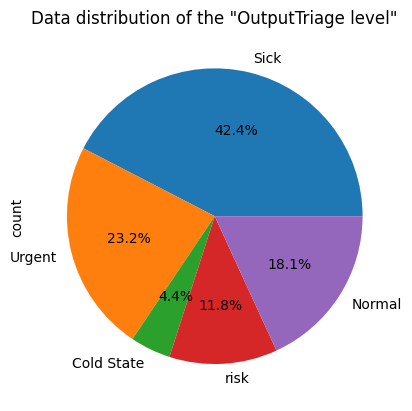

In [9]:
#Pie chart

OutputTriage_level = pd.Series(index=['Sick', 'Urgent', 'Cold State', 'risk', 'Normal'],
                   data= dataset['OutputTriage level'].value_counts() ,
                   )

# print(OutputTriage_level)
plt.title('Data distribution of the "OutputTriage level"') 

OutputTriage_level.plot(kind='pie',autopct='%1.1f%%')


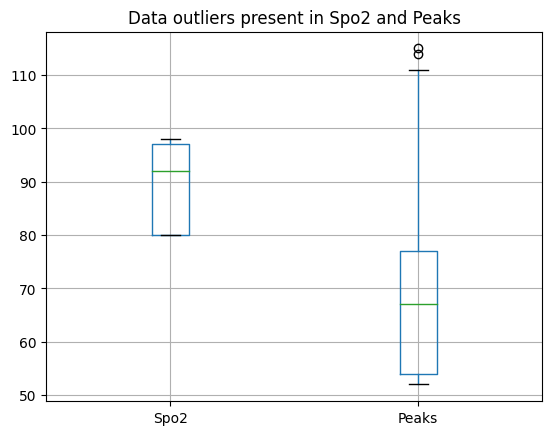

In [10]:
#Box plot to show the numeric value difference between oxygen level and heart rate
plt.title('Data outliers present in Spo2 and Peaks') 
boxplot = dataset.boxplot(figsize = (5,5))

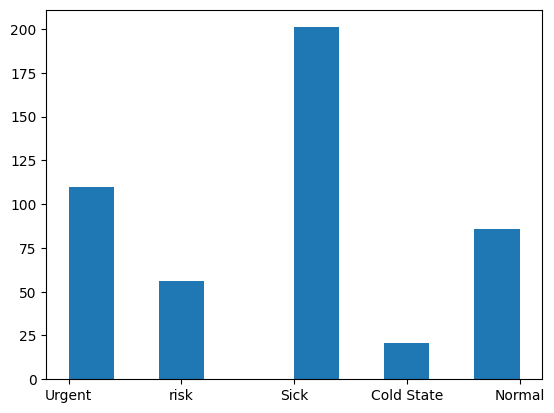

In [11]:
# histogram for the OutputTriage level
plt.hist(y)
plt.show() 

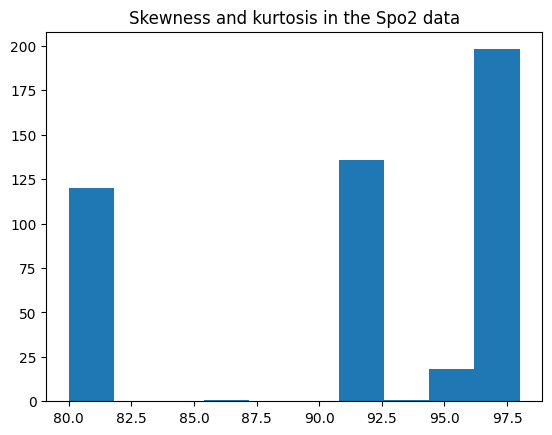

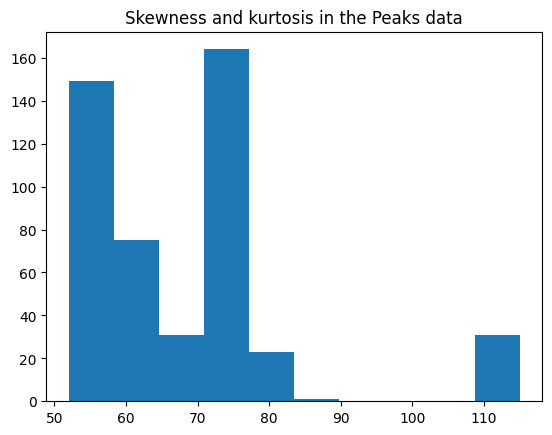

In [12]:
# Histogram graph
plt.title('Skewness and kurtosis in the Spo2 data') 
x = dataset['Spo2']
plt.hist(x)
plt.show() 

plt.title('Skewness and kurtosis in the Peaks data') 
x = dataset['Peaks']
plt.hist(x)
plt.show() 

#if can add skew function and kurtosis then it would be nice

In [13]:
class_mapping = {
    'Sick': 'Abnormal',
    'Urgent': 'Abnormal',
    'risk': 'Abnormal',
    'Cold State': 'Abnormal',
    'Normal': 'Normal'
}

# Regroup the target classes
dataset['OutputTriage level'] = dataset['OutputTriage level'].map(class_mapping)

Deduplicate data

In [18]:
deduplicated_dataset = dataset.drop_duplicates()

# Print the deduplicated dataset
print(deduplicated_dataset)

     Spo2  Peaks OutputTriage level
0      80     67           Abnormal
24     97     54           Abnormal
40     92     54           Abnormal
120    80     54           Abnormal
168    97     77           Abnormal
184    92     77           Abnormal
264    80     77           Abnormal
312    97     64           Abnormal
328    92     64           Abnormal
380    96     79             Normal
381    98     70             Normal
382    98     71             Normal
383    97     71             Normal
384    97     72             Normal
385    94     69             Normal
386    97     78             Normal
387    97     80             Normal
388    97     79             Normal
389    97     76             Normal
392    97     70             Normal
393    96     71             Normal
394    96     70             Normal
395    97     62             Normal
396    97     64             Normal
397    97     65             Normal
401    98     57             Normal
403    98     61            

Remove outlier from the dataset

In [19]:
z_scores = np.abs(stats.zscore(deduplicated_dataset["Spo2"]))

# Define a threshold for outlier detection
threshold = 3

# Identify outlier indices
outlier_indices = np.where(z_scores > threshold)

# Remove outliers from the data
spo2_no_outliers = deduplicated_dataset[np.logical_not(np.isin(np.arange(len(deduplicated_dataset["Spo2"])), outlier_indices))]

z_scores = np.abs(stats.zscore(spo2_no_outliers["Peaks"]))

# Define a threshold for outlier detection
threshold = 3

# Identify outlier indices
outlier_indices = np.where(z_scores > threshold)

# Remove outliers from the data
data_no_outliers = spo2_no_outliers[np.logical_not(np.isin(np.arange(len(spo2_no_outliers["Peaks"])), outlier_indices))]

# Print the original data and data without outliers
print("Original Data:", spo2_no_outliers["Peaks"])
print("Data without Outliers:", data_no_outliers)

Original Data: 24      54
40      54
168     77
184     77
312     64
328     64
380     79
381     70
382     71
383     71
384     72
385     69
386     78
387     80
388     79
389     76
392     70
393     71
394     70
395     62
396     64
397     65
401     57
403     61
404     83
405     82
408     65
409     66
411     76
412     73
413     76
414     77
416     55
417     56
418     52
419     73
420     79
421     77
422     63
425     83
426     79
427     77
438     75
440     78
441     86
443    111
444    115
445    114
446    110
466    110
Name: Peaks, dtype: int64
Data without Outliers:      Spo2  Peaks OutputTriage level
24     97     54           Abnormal
40     92     54           Abnormal
168    97     77           Abnormal
184    92     77           Abnormal
312    97     64           Abnormal
328    92     64           Abnormal
380    96     79             Normal
381    98     70             Normal
382    98     71             Normal
383    97     71          

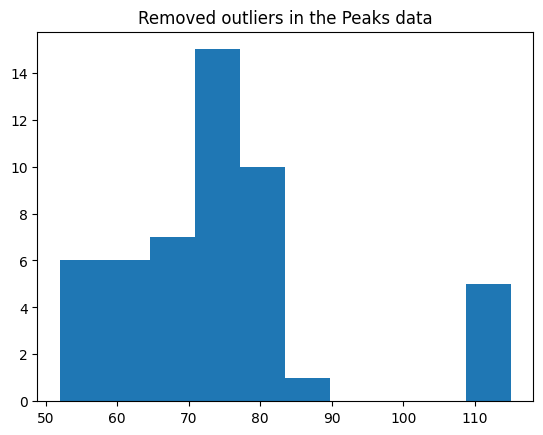

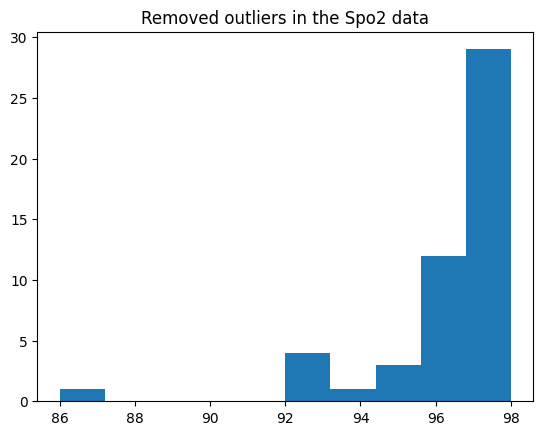

In [20]:
plt.title('Removed outliers in the Peaks data') 
x = data_no_outliers["Peaks"]
plt.hist(x)
plt.show() 

plt.title('Removed outliers in the Spo2 data') 
x = data_no_outliers["Spo2"]
plt.hist(x)
plt.show() 

In [21]:
selected_features = ['Spo2', 'Peaks']

# Calculate the skewness and kurtosis of the original data
original_skewness = data_no_outliers[selected_features].skew()
original_kurtosis = data_no_outliers[selected_features].kurtosis()

# Apply Box-Cox transformation to selected features
transformed_features = pd.DataFrame()
for feature in selected_features:
    transformed_feature, _ = boxcox(data_no_outliers[feature])
    transformed_features[feature] = transformed_feature


# Calculate the skewness and kurtosis of the transformed data

transformed_skewness = transformed_features.skew()
transformed_kurtosis = transformed_features.kurtosis()
transformed_sqrt = np.sqrt(transformed_features)


print("Original Skewness:")
print(original_skewness)
print("\nOriginal Kurtosis:")
print(original_kurtosis)
print("\nTransformed Skewness:")
print(transformed_skewness)
print("\nTransformed Kurtosis:")
print(transformed_kurtosis)
print("\nTransformed Square root:")
print(transformed_sqrt)

Original Skewness:
Spo2    -2.694004
Peaks    1.218664
dtype: float64

Original Kurtosis:
Spo2     9.517077
Peaks    1.676238
dtype: float64

Transformed Skewness:
Spo2    -0.285819
Peaks   -0.005259
dtype: float64

Transformed Kurtosis:
Spo2    -0.399978
Peaks    0.239704
dtype: float64

Transformed Square root:
            Spo2     Peaks
0   2.001068e+35  0.992656
1   7.653428e+34  0.992656
2   2.001068e+35  0.995488
3   7.653428e+34  0.995488
4   2.001068e+35  0.994138
5   7.653428e+34  0.994138
6   1.657789e+35  0.995656
7   2.410773e+35  0.994823
8   2.410773e+35  0.994926
9   2.001068e+35  0.994926
10  2.001068e+35  0.995026
11  1.131041e+35  0.994717
12  2.001068e+35  0.995573
13  2.001068e+35  0.995737
14  2.001068e+35  0.995656
15  2.001068e+35  0.995400
16  2.001068e+35  0.994823
17  1.657789e+35  0.994926
18  1.657789e+35  0.994823
19  2.001068e+35  0.993879
20  2.001068e+35  0.994138
21  2.001068e+35  0.994261
22  2.410773e+35  0.993155
23  2.410773e+35  0.993744
24  1.6577

In [ ]:
# Create a pandas DataFrame
df = pd.DataFrame(data, columns=['Value'])

# Calculate the skewness of the original data
original_skewness = df['Value'].skew()

# Apply logarithmic transformation
df['LogTransform'] = np.log(df['Value'])

# Calculate the skewness after transformation
log_transform_skewness = df['LogTransform'].skew()

# Apply square root transformation
df['SqrtTransform'] = np.sqrt(df['Value'])

# Calculate the skewness after transformation
sqrt_transform_skewness = df['SqrtTransform'].skew()

print("Original Skewness:", original_skewness)
print("Log Transform Skewness:", log_transform_skewness)
print("Square Root Transform Skewness:", sqrt_transform_skewness)

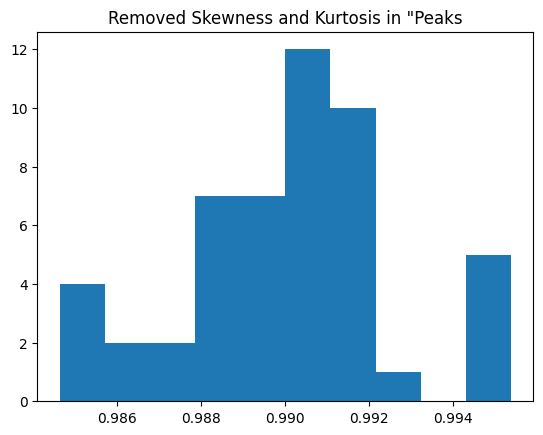

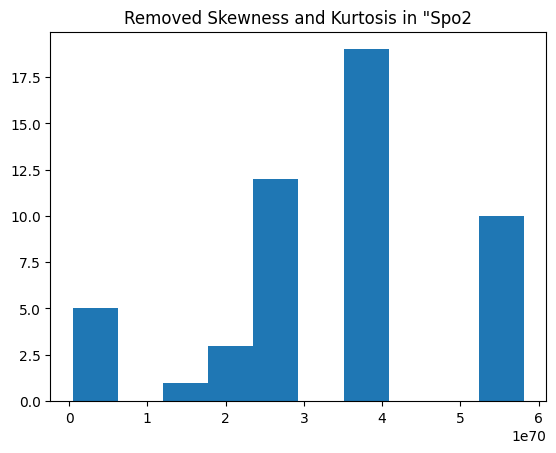

In [23]:
plt.title('Removed Skewness and Kurtosis in "Peaks') 
x = transformed_features["Peaks"]
plt.hist(x)
plt.show() 

plt.title('Removed Skewness and Kurtosis in "Spo2') 
x = transformed_features["Spo2"]
plt.hist(x)
plt.show() 


In [38]:
scaler = MinMaxScaler()

selected_features = ['Spo2', 'Peaks']
# Apply Min-Max scaling to selected features
transformed_features[selected_features] = scaler.fit_transform(transformed_features[selected_features])

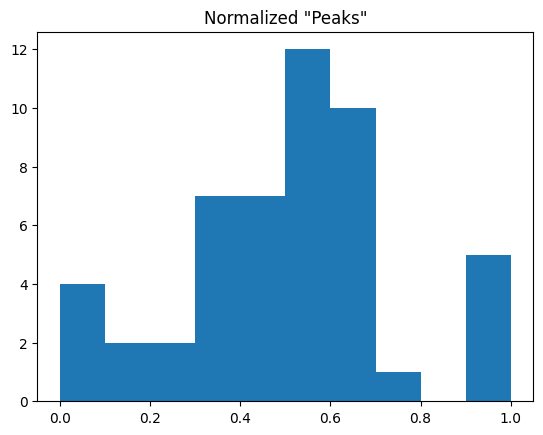

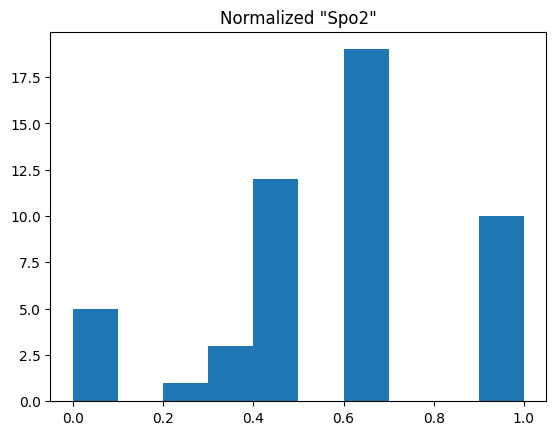

In [39]:
plt.title('Normalized "Peaks"') 
x = transformed_features["Peaks"]
plt.hist(x)
plt.show() 

plt.title('Normalized "Spo2"') 
x = transformed_features["Spo2"]
plt.hist(x)
plt.show() 